In [1]:
import seaborn as sb
import matplotlib.pyplot as mpl
from sklearn.datasets import load_wine

# Загрузка данных

In [2]:
df =  load_wine()
x = df.data
y = df.target
print(x,y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


13 измерений

In [3]:
x.shape

(178, 13)

# Pca

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
x_centered = x - x.mean(axis=0)
pca.fit(x_centered)
x_pca_transformed = pca.transform(x_centered)

In [ ]:
x_centered = x - x.mean(axis=0)

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

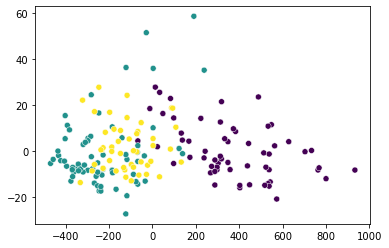

In [ ]:
sb.scatterplot(x_pca_transformed[:,0], x_pca_transformed[:,1],c=y)

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

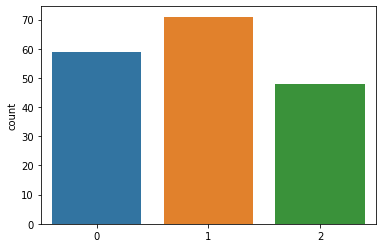

In [ ]:
sb.countplot(y)

## Приведенные данные

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_pca_train, x_pca_test, y_pca_train,y_pca_test =train_test_split(x_pca_transformed, y, stratify=y, test_size=0.3)

In [ ]:
pca_forest = RandomForestClassifier(max_depth=2, random_state=42)
pca_forest.fit(x_pca_train, y_pca_train)
pca_forest_predict = pca_forest.predict(x_pca_test)

print('Accuracy {:.5f}'.format(accuracy_score(y_pca_test, pca_forest_predict)))

Accuracy 0.75926


Точность пойдет, но бывает и лучше

## Неприведенные данные

In [ ]:
x_base_train, x_base_test, y_base_train,y_base_test =train_test_split(x, y, stratify=y, test_size=0.3)


In [ ]:
base_forest = RandomForestClassifier(max_depth=2, random_state=42)
base_forest.fit(x_base_train, y_base_train)
base_forest_predict = base_forest.predict(x_base_test)

print('Accuracy {:.5f}'.format(accuracy_score(y_base_test, base_forest_predict)))

Accuracy 0.94444


Что то пошло не так

# TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state=42)
x_tsne = tsne.fit_transform(x)

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

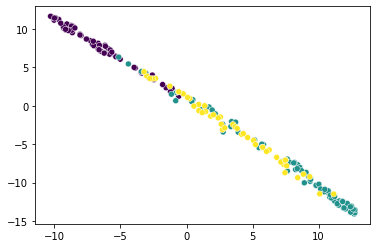

In [ ]:
sb.scatterplot(x_tsne[:,0], x_tsne[:,1],c=y)

In [ ]:
x_tsne_train, x_tsne_test, y_tsne_train,y_tsne_test =train_test_split(x_tsne, y, stratify=y, test_size=0.3)

In [ ]:
tsne_forest = RandomForestClassifier(max_depth=2, random_state=42)
tsne_forest.fit(x_tsne_train, y_tsne_train)
tsne_forest_predict = tsne_forest.predict(x_tsne_test)

print('Accuracy {:.5f}'.format(accuracy_score(y_tsne_test, tsne_forest_predict)))

Accuracy 0.68519
